<a href="https://colab.research.google.com/github/ringgoagsya/latihan_python/blob/main/naive_bayes_1811522023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Naive Bayes Classification**

In [ ]:
# import library standar untuk melakukan classification
import pandas as pd
import string
import numpy as np
import nltk

In [ ]:
# import untuk mesin Learning naive bayes
from sklearn.naive_bayes import MultinomialNB
from sklearn import model_selection
from sklearn. feature_extraction.text import CountVectorizer
from sklearn. feature_extraction. text import TfidfTransformer
from sklearn. model_selection import train_test_split
from sklearn.utils.multiclass import unique_labels
from sklearn. preprocessing import LabelBinarizer, OrdinalEncoder, OneHotEncoder

In [ ]:
# visualisasi hasil
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
from google.colab import drive
drive.mount("/content/gdrive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.activity.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fexperimentsandconfigs%20https%3a%2f%2fwww.googleapis.com%2fauth%2fphotos.native&response_type=code

Enter your authorization code:
4/1AY0e-g6BXFBy7THiSyAqWGGYwikBA5boLTfFeJQ806QU5sYd8gIrIcMC9ns
Mounted at /content/gdrive


In [5]:
# untuk memanggil dataset yang digunakan yaitu pada file bank.csv
filecsv = '/content/gdrive/My Drive/bank.csv'
teks = pd.read_csv(filecsv, header=0, delimiter=';', encoding= 'utf-8')
df = pd.DataFrame(teks)
print(df)

      age            job  marital  education  ... pdays  previous poutcome   y
0      30     unemployed  married    primary  ...    -1         0  unknown  no
1      33       services  married  secondary  ...   339         4  failure  no
2      35     management   single   tertiary  ...   330         1  failure  no
3      30     management  married   tertiary  ...    -1         0  unknown  no
4      59    blue-collar  married  secondary  ...    -1         0  unknown  no
...   ...            ...      ...        ...  ...   ...       ...      ...  ..
4516   33       services  married  secondary  ...    -1         0  unknown  no
4517   57  self-employed  married   tertiary  ...    -1         0  unknown  no
4518   57     technician  married  secondary  ...    -1         0  unknown  no
4519   28    blue-collar  married  secondary  ...   211         3    other  no
4520   44   entrepreneur   single   tertiary  ...   249         7    other  no

[4521 rows x 17 columns]


In [6]:
# input parameter untuk prediksi class
xtarget = df.drop(['y'], axis = 1)
print(xtarget)

      age            job  marital  ... pdays previous  poutcome
0      30     unemployed  married  ...    -1        0   unknown
1      33       services  married  ...   339        4   failure
2      35     management   single  ...   330        1   failure
3      30     management  married  ...    -1        0   unknown
4      59    blue-collar  married  ...    -1        0   unknown
...   ...            ...      ...  ...   ...      ...       ...
4516   33       services  married  ...    -1        0   unknown
4517   57  self-employed  married  ...    -1        0   unknown
4518   57     technician  married  ...    -1        0   unknown
4519   28    blue-collar  married  ...   211        3     other
4520   44   entrepreneur   single  ...   249        7     other

[4521 rows x 16 columns]


In [7]:
# target classification dari accepted
ytarget = df['y']
print(ytarget)

0       no
1       no
2       no
3       no
4       no
        ..
4516    no
4517    no
4518    no
4519    no
4520    no
Name: y, Length: 4521, dtype: object


In [8]:
# merubah nilai ytarget menjadi dua class yaitu 1 atau 0
encoder = LabelBinarizer()
y = encoder.fit_transform(ytarget)
print(y)

[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]


In [9]:
#Merubah nilai atribut menjadi index nilai
tfidf_transformer = OneHotEncoder()
x = tfidf_transformer.fit_transform(xtarget)
print(x)
print(x.shape)

  (0, 11)	1.0
  (0, 77)	1.0
  (0, 80)	1.0
  (0, 82)	1.0
  (0, 86)	1.0
  (0, 1563)	1.0
  (0, 2441)	1.0
  (0, 2443)	1.0
  (0, 2445)	1.0
  (0, 2466)	1.0
  (0, 2489)	1.0
  (0, 2566)	1.0
  (0, 3366)	1.0
  (0, 3398)	1.0
  (0, 3690)	1.0
  (0, 3717)	1.0
  (1, 14)	1.0
  (1, 74)	1.0
  (1, 80)	1.0
  (1, 83)	1.0
  (1, 86)	1.0
  (1, 2118)	1.0
  (1, 2442)	1.0
  (1, 2444)	1.0
  (1, 2445)	1.0
  :	:
  (4519, 2443)	1.0
  (4519, 2445)	1.0
  (4519, 2453)	1.0
  (4519, 2482)	1.0
  (4519, 2616)	1.0
  (4519, 3369)	1.0
  (4519, 3538)	1.0
  (4519, 3693)	1.0
  (4519, 3715)	1.0
  (4520, 25)	1.0
  (4520, 69)	1.0
  (4520, 81)	1.0
  (4520, 84)	1.0
  (4520, 86)	1.0
  (4520, 1274)	1.0
  (4520, 2442)	1.0
  (4520, 2444)	1.0
  (4520, 2445)	1.0
  (4520, 2450)	1.0
  (4520, 2479)	1.0
  (4520, 2832)	1.0
  (4520, 3367)	1.0
  (4520, 3559)	1.0
  (4520, 3697)	1.0
  (4520, 3715)	1.0
(4521, 3718)


In [10]:
#Membuat data training dan data testing dari dataset data test = 30% dari jumlah instance
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 1)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3164, 3718)
(3164, 1)
(1357, 3718)
(1357, 1)


In [11]:
#Melakukan pembuatan model training dengan Naive Bayes
NaiveBayes = MultinomialNB(). fit(x_train, np.ravel(y_train, order = 'C'))
print(NaiveBayes)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)


In [12]:
#Prediksi terhadap model training yang telah dibuat
prediction = NaiveBayes.predict(x_test)
accuracies = accuracy_score(y_test, prediction)

print(prediction)
print(accuracies)

[0 0 0 ... 0 0 0]
0.8754605747973471


In [13]:
#Menampilkan matrik konfusi
print (confusion_matrix(y_test, prediction))

[[1165   17]
 [ 152   23]]


In [18]:
#Procedure untuk memetakan matrik konfusi
def plot_confusion_matrix(y_true, y_pred, classes, 
                          normalize=False, 
                          title=None, 
                          cmap=plt.cm.Blues):
  if not title :
    if normalize:
      title = 'Normalize confusion matrix'
    else:
      title = 'confusion matrix, without normalization'
  #Compute confusion matrix
  cm = confusion_matrix(y_true, y_pred)
  #only use labels that appear in the data
  classes = classes[unique_labels(y_true, y_pred)]
  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print("Normalized Confusion Matrix")
  else:
    print('Confusion Matrix, without normalization')

  print(cm)

  fig, ax = plt.subplots()
  im = ax.imshow(cm, interpolation='nearest', cmap=cmap)

  #we want to show all tickets
  ax.set(xticks=np.arange(cm.shape[1]), 
        yticks=np.arange(cm.shape[0]),
        #... and label them with the respective list entries
        xticklabels=classes, yticklabels=classes,
        title=title,
        ylabel='True Label',
        xlabel='Predicted Label')

  #Rotate the tick Labels and set Their aligment.
  plt.setp(ax.get_xticklabels(), rotation=45, ha="right", 
           rotation_mode="anchor")

  #Loop over data dimensions and create text annocations
  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i in range(cm.shape[0]):
   for j in range(cm.shape[1]):
      ax.text(j,i, format(cm[i,j], fmt),
              ha="center", va="center",
              color="black" if cm[i,j] > thresh else "black")
    
  fig.tight_layout()
  return ax



Confusion Matrix, without normalization
[[1165   17]
 [ 152   23]]
Normalized Confusion Matrix
[[0.99 0.01]
 [0.87 0.13]]


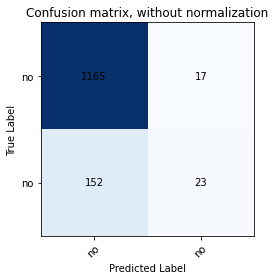

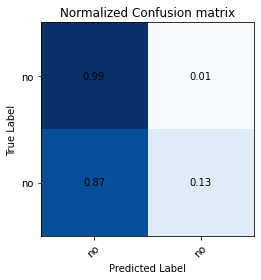

In [19]:
#visualisasi hasil
class_names = ytarget
np.set_printoptions(precision=2)

#plot non-normalized confusion matrix
plot_confusion_matrix(y_test, prediction, classes=class_names,
                      title='Confusion matrix, without normalization')

#Plot normalized confusion matrix
plot_confusion_matrix(y_test, prediction, classes=class_names, normalize=True,
                      title='Normalized Confusion matrix')

plt.show()